
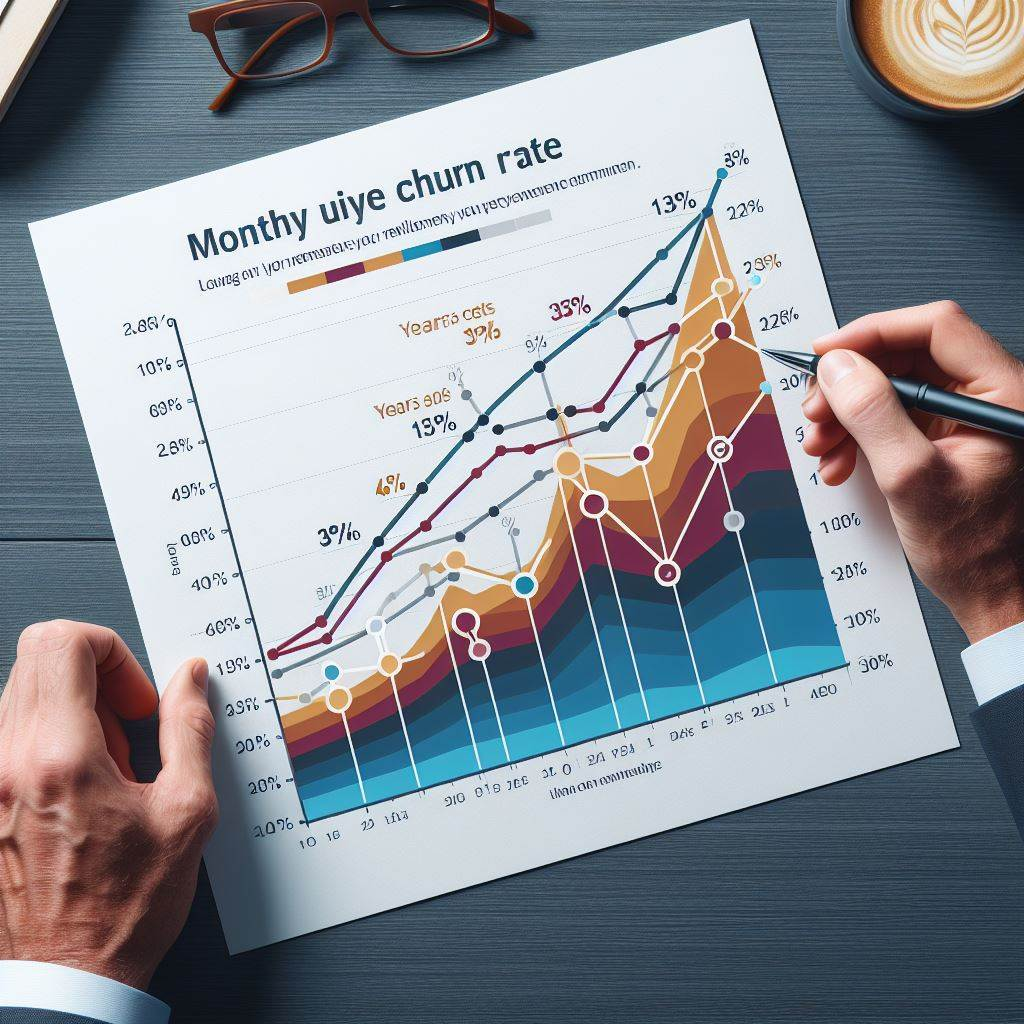




####                                                 **Problem Statement:**



**Customer churn, also known as customer attrition, refers to the phenomenon whereby a customer leaves a product or service. In the banking sector, customer churn can be a significant issue, as the cost of acquiring a new customer is often higher than the cost of retaining an existing.**


**The problem as follows:**


**A bank is experiencing a loss in business due to an increasing number of customers leaving (churning). The bank wants to identify these customers early on, so they can proactively offer them incentives to stay. My task as a data scientist is to build a predictive model that will help the bank identify customers who are likely to churn in the near future.**



#### **Understand the Industry:**

**This is a Supervised Learning problem because we have labeled data (churn or not churn). The banking industry is highly competitive and customer retention is a key aspect of a bank’s strategy. Understanding the industry will help you understand the importance of the problem and how your solution could be beneficial.**


#### **Understand the Business Objective:**

**The business objective is to increase customer retention. By predicting churn, the bank can proactively reach out to customers who are likely to churn and offer them incentives to stay. This could be more cost-effective than acquiring new customers. The desired outcome is a reduction in customer churn and an increase in customer loyalty and overall profitability.**





#### **About Dataset**

**Our database has 10000 values ​​and 18 columns, Here we will use the "Customer-Churn-Records.csv" database that has been made available for use, below you will see an analysis of the data, the processing of this data and the use of the learning classification of machine models to achieve our goal**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn import set_config
set_config(display='diagram')

In [6]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/saifghostrider454/Almabetter-ML-Mid_Course/main/Customer-Churn-Records.csv')

In [8]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
2799,2800,15775662,McKay,760,France,Male,43,8,121911.59,1,1,0,193312.33,0,0,3,SILVER,224
835,836,15575883,Manna,559,France,Male,34,2,137390.11,2,1,0,9677.00,0,0,4,PLATINUM,796
3370,3371,15749905,Carr,698,Spain,Female,47,6,0.00,1,1,0,50213.81,1,1,4,PLATINUM,625
4620,4621,15798960,Meng,680,France,Male,33,2,108393.35,1,0,1,39057.67,0,0,3,GOLD,425
9164,9165,15767488,Berry,680,Spain,Male,36,7,0.00,2,1,0,20109.21,0,0,5,DIAMOND,524


**Here we can see that we have categorical and continuous variables, we can also see that we don't have null values.**

1. RowNumber: corresponds to the record (row) number and has no effect on the output.
2. CustomerId: contains random values and has no effect on customer leaving the bank.
3. Surname: the surname of a customer has no impact on their decision to leave the bank.
4. CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5. Geography: a customer’s location can affect their decision to leave the bank.
6. Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
7. Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8. Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
9. Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10. NumOfProducts: refers to the number of products that a customer has purchased through the bank.
11. HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12. IsActiveMember: active customers are less likely to leave the bank.
13. EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14. Exited: whether or not the customer left the bank.
15. Complain: customer has complaint or not.
16. Satisfaction Score: Score provided by the customer for their complaint resolution.
17. Card Type: type of card hold by the customer.
18. Points Earned: the points earned by the customer for using credit card.

### EDA

#### Dataset Information

In [6]:
# Dataset Info
desc_df = pd.DataFrame(index=list(df))
desc_df['count'] = df.count()
desc_df['nunique'] = df.nunique()
desc_df['%unique'] = desc_df['nunique'] / len(df) * 100
desc_df['null'] = df.isnull().sum()
desc_df['type'] = df.dtypes
desc_df = desc_df.style.background_gradient(cmap='Greens')
desc_df

,count,nunique,%unique,null,type
RowNumber,10000,10000,100.000000,0,int64
CustomerId,10000,10000,100.000000,0,int64
Surname,10000,2932,29.320000,0,object
CreditScore,10000,460,4.600000,0,int64
Geography,10000,3,0.030000,0,object
Gender,10000,2,0.020000,0,object
Age,10000,70,0.700000,0,int64
Tenure,10000,11,0.110000,0,int64
Balance,10000,6382,63.820000,0,float64
NumOfProducts,10000,4,0.040000,0,int64


In [7]:
# Dataset Describe
df.describe().T \
.style.bar(subset=['mean'], color=px.colors.qualitative.G10[0]) \
.background_gradient(subset=['std'], cmap='Greens') \
.background_gradient(subset=['50%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


In [8]:
# Write your code to make your dataset analysis ready.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    It gives the names of categorical, numerical, and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
        cat_th: int, optional
                the class threshold for numeric but categorical variables
        car_th: int, optinal
                the class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical Variables List
        num_cols: list
                Numeric Variables List
        cat_but_car: list
                Categorical but cardinal variables list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is in cat_cols

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 10000
Variables: 18
cat_cols: 9
num_cols: 8
cat_but_car: 1
num_but_cat: 6


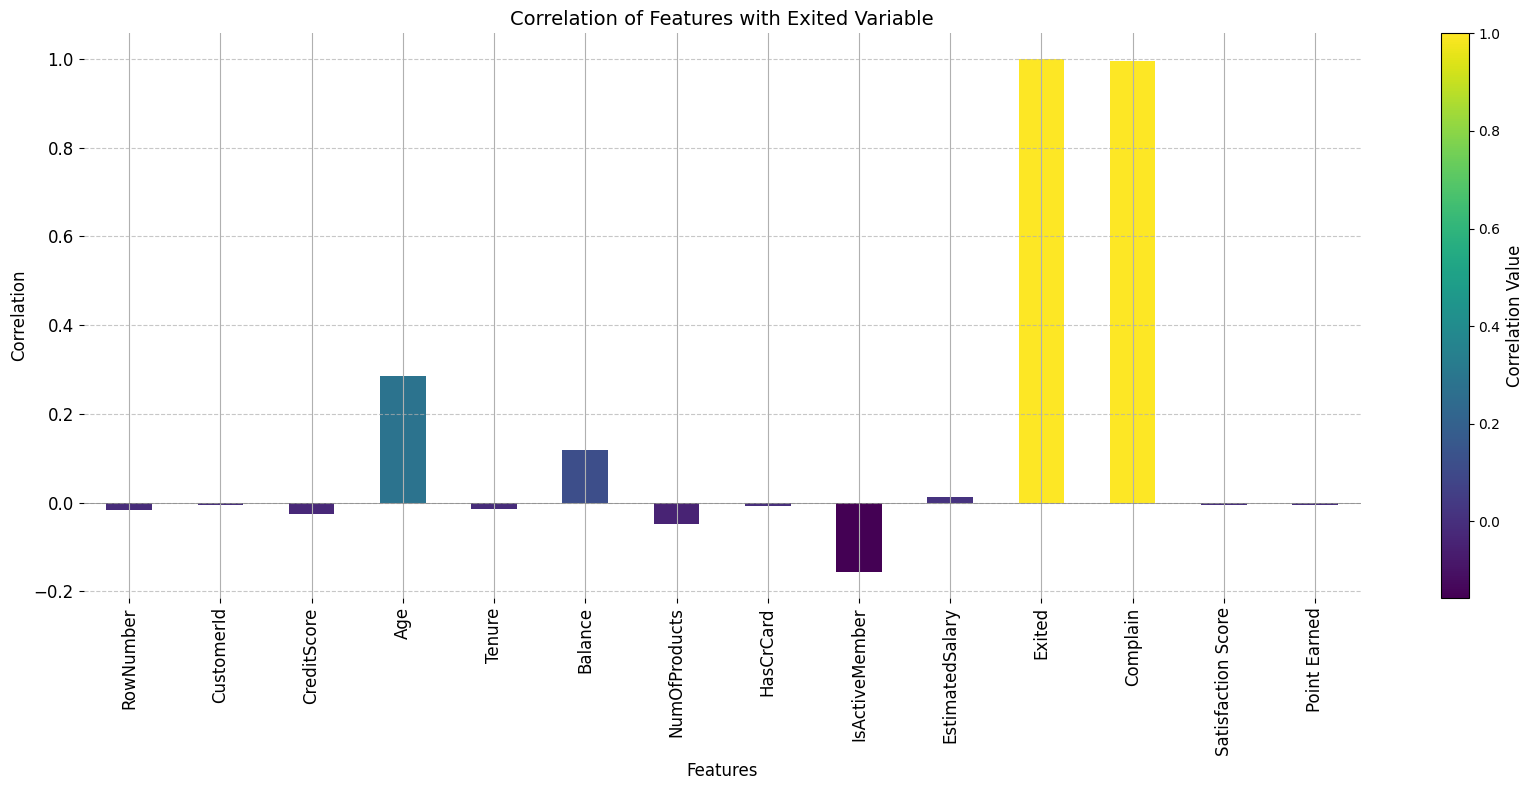

In [9]:
# Sample data preprocessing
numeric_columns = df.select_dtypes(exclude='object').columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Compute correlations
correlations = df[numeric_columns].corrwith(df['Exited'])

# Define a custom colormap based on correlation values
norm = plt.Normalize(correlations.min(), correlations.max())
colors = plt.cm.viridis(norm(correlations))

# Create the plot

plt.figure(figsize=(17, 8))
bar_plot = correlations.plot.bar(title='Correlation with Exited Variable', 
                                  fontsize=12, grid=True, color=colors)

# Set plot aesthetics
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Exited Variable', fontsize=14)
plt.axhline(0, color='gray', linewidth=0.5)  # Add a horizontal line at correlation 0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)  # Remove box around the plot

# Add colorbar for better visualization of correlation values
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=bar_plot)
cbar.set_label('Correlation Value', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()



<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

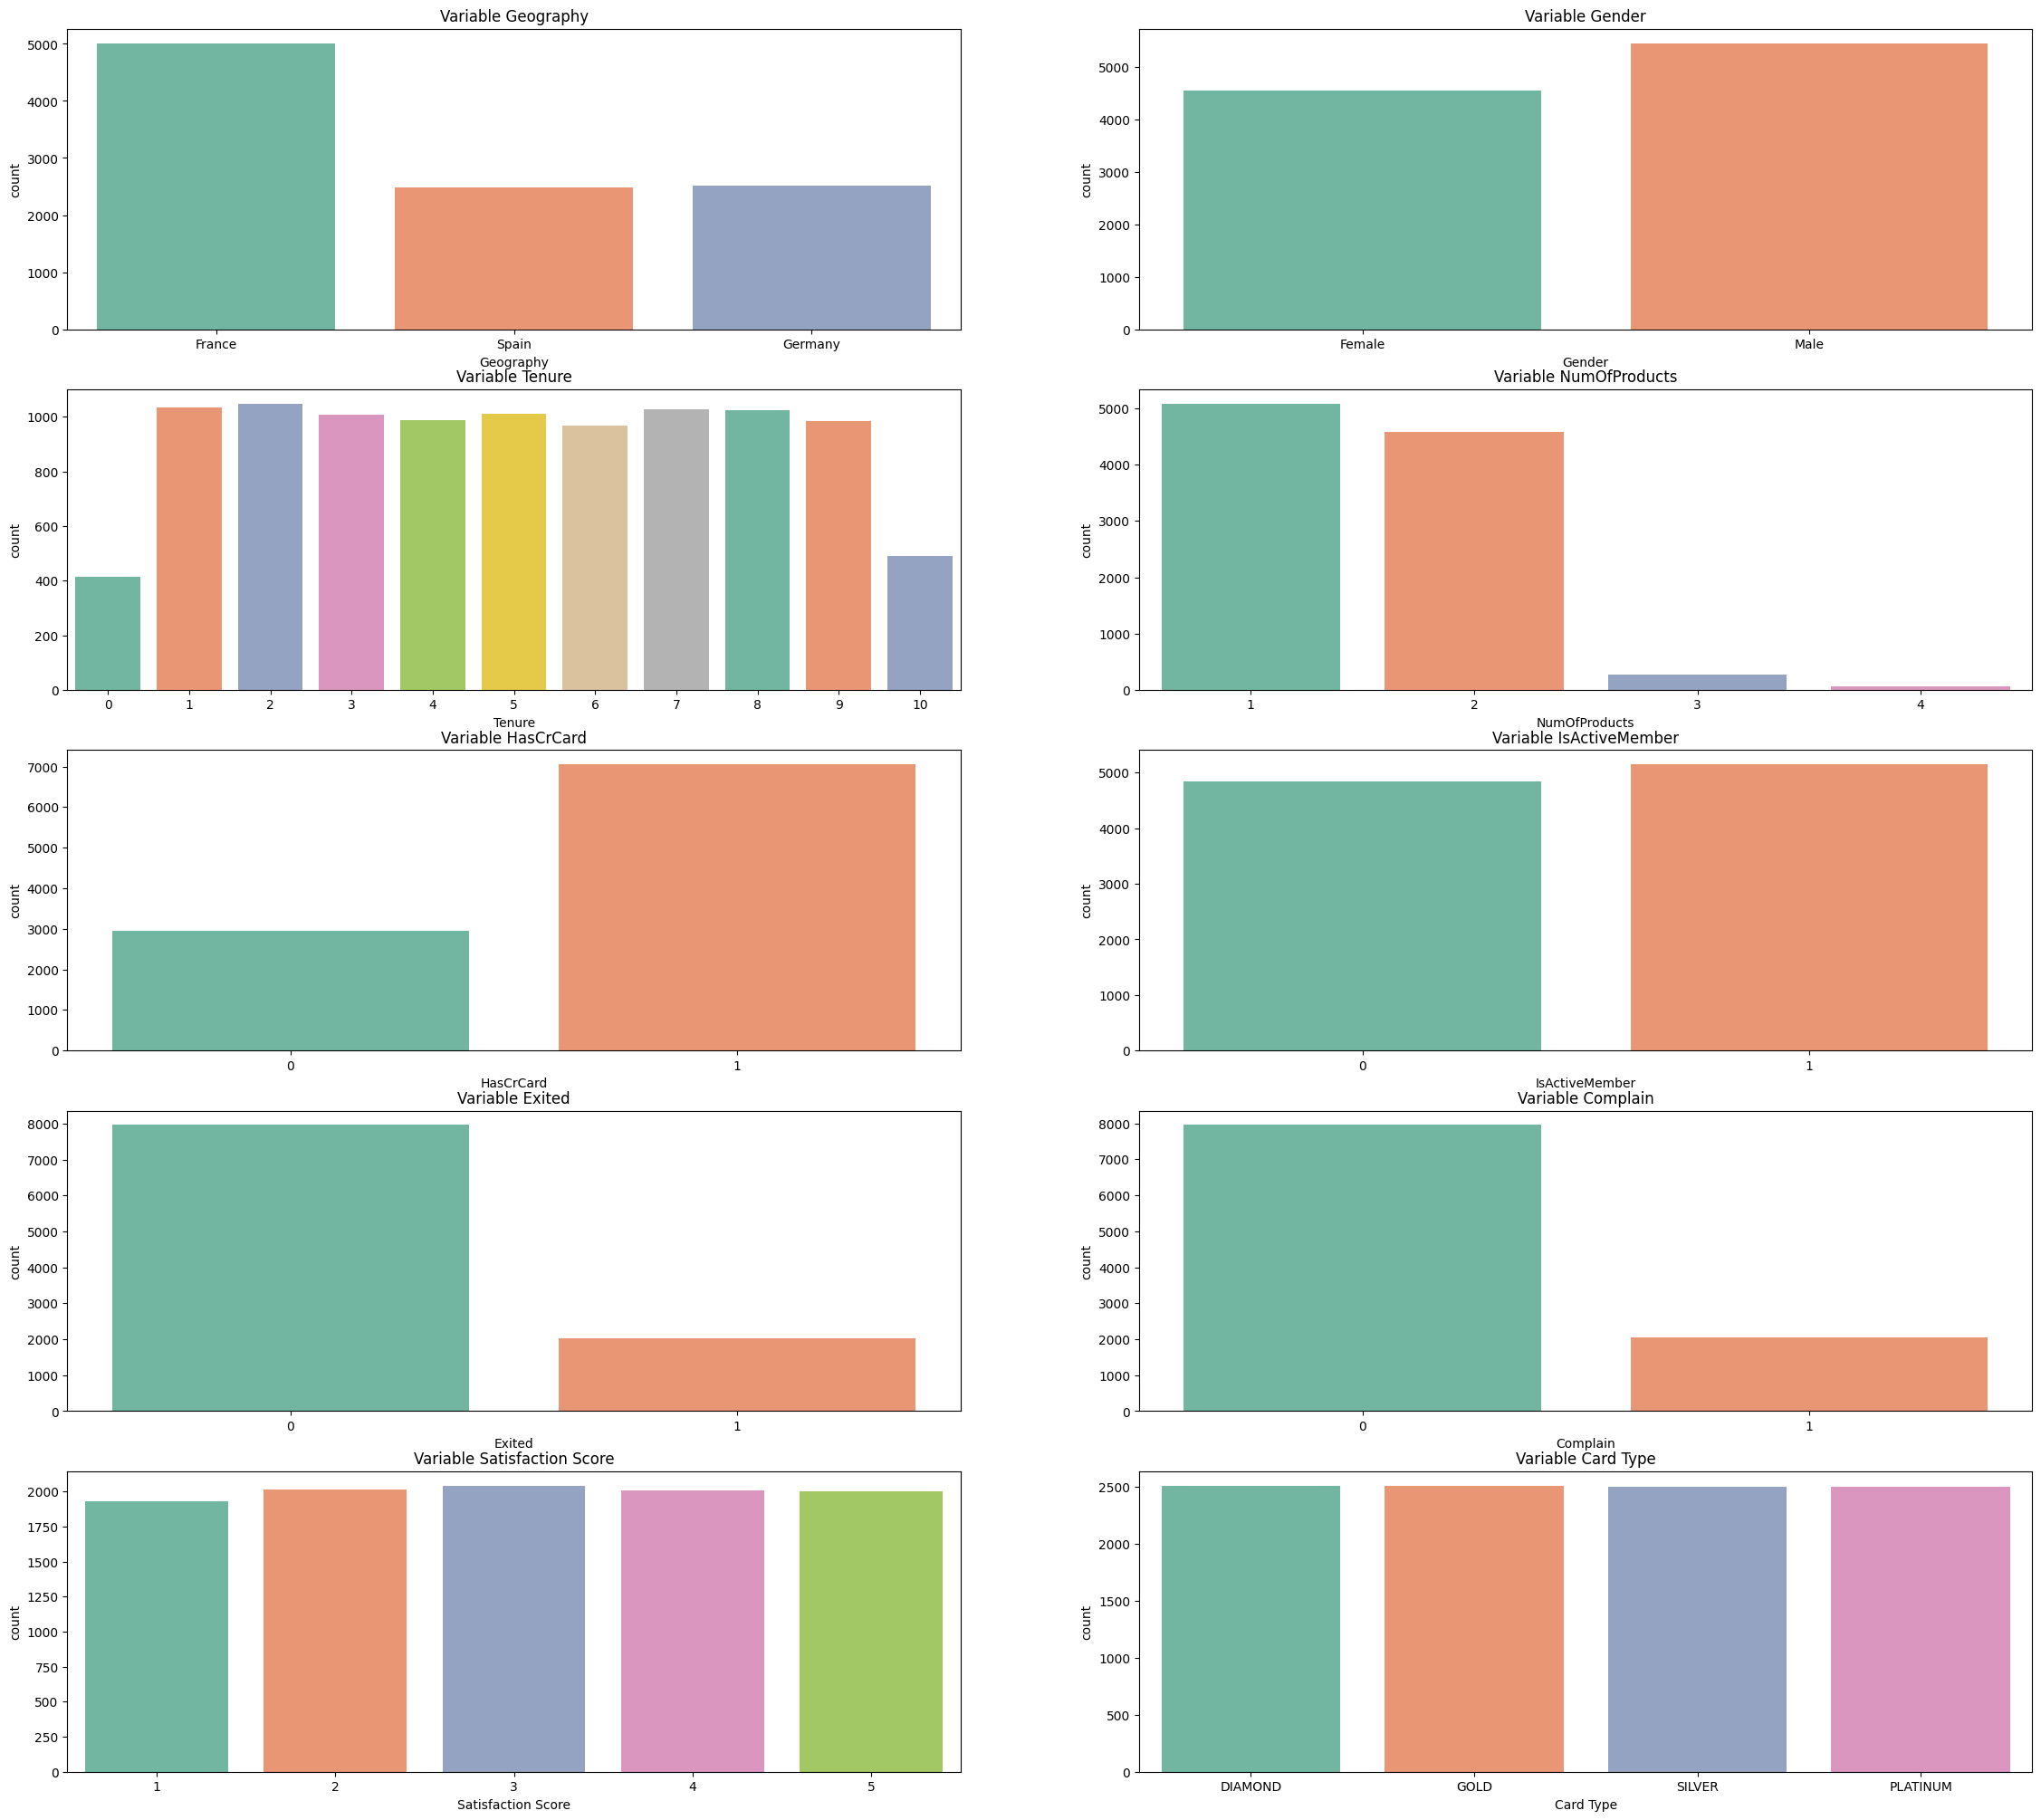

In [10]:
plt.figure(figsize = (28, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Exited')
sns.countplot(x = 'Exited', palette = 'Set2', data = df)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Complain')
sns.countplot(x = 'Complain', palette = 'Set2', data = df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', palette = 'Set2', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', palette = 'Set2', data = df)

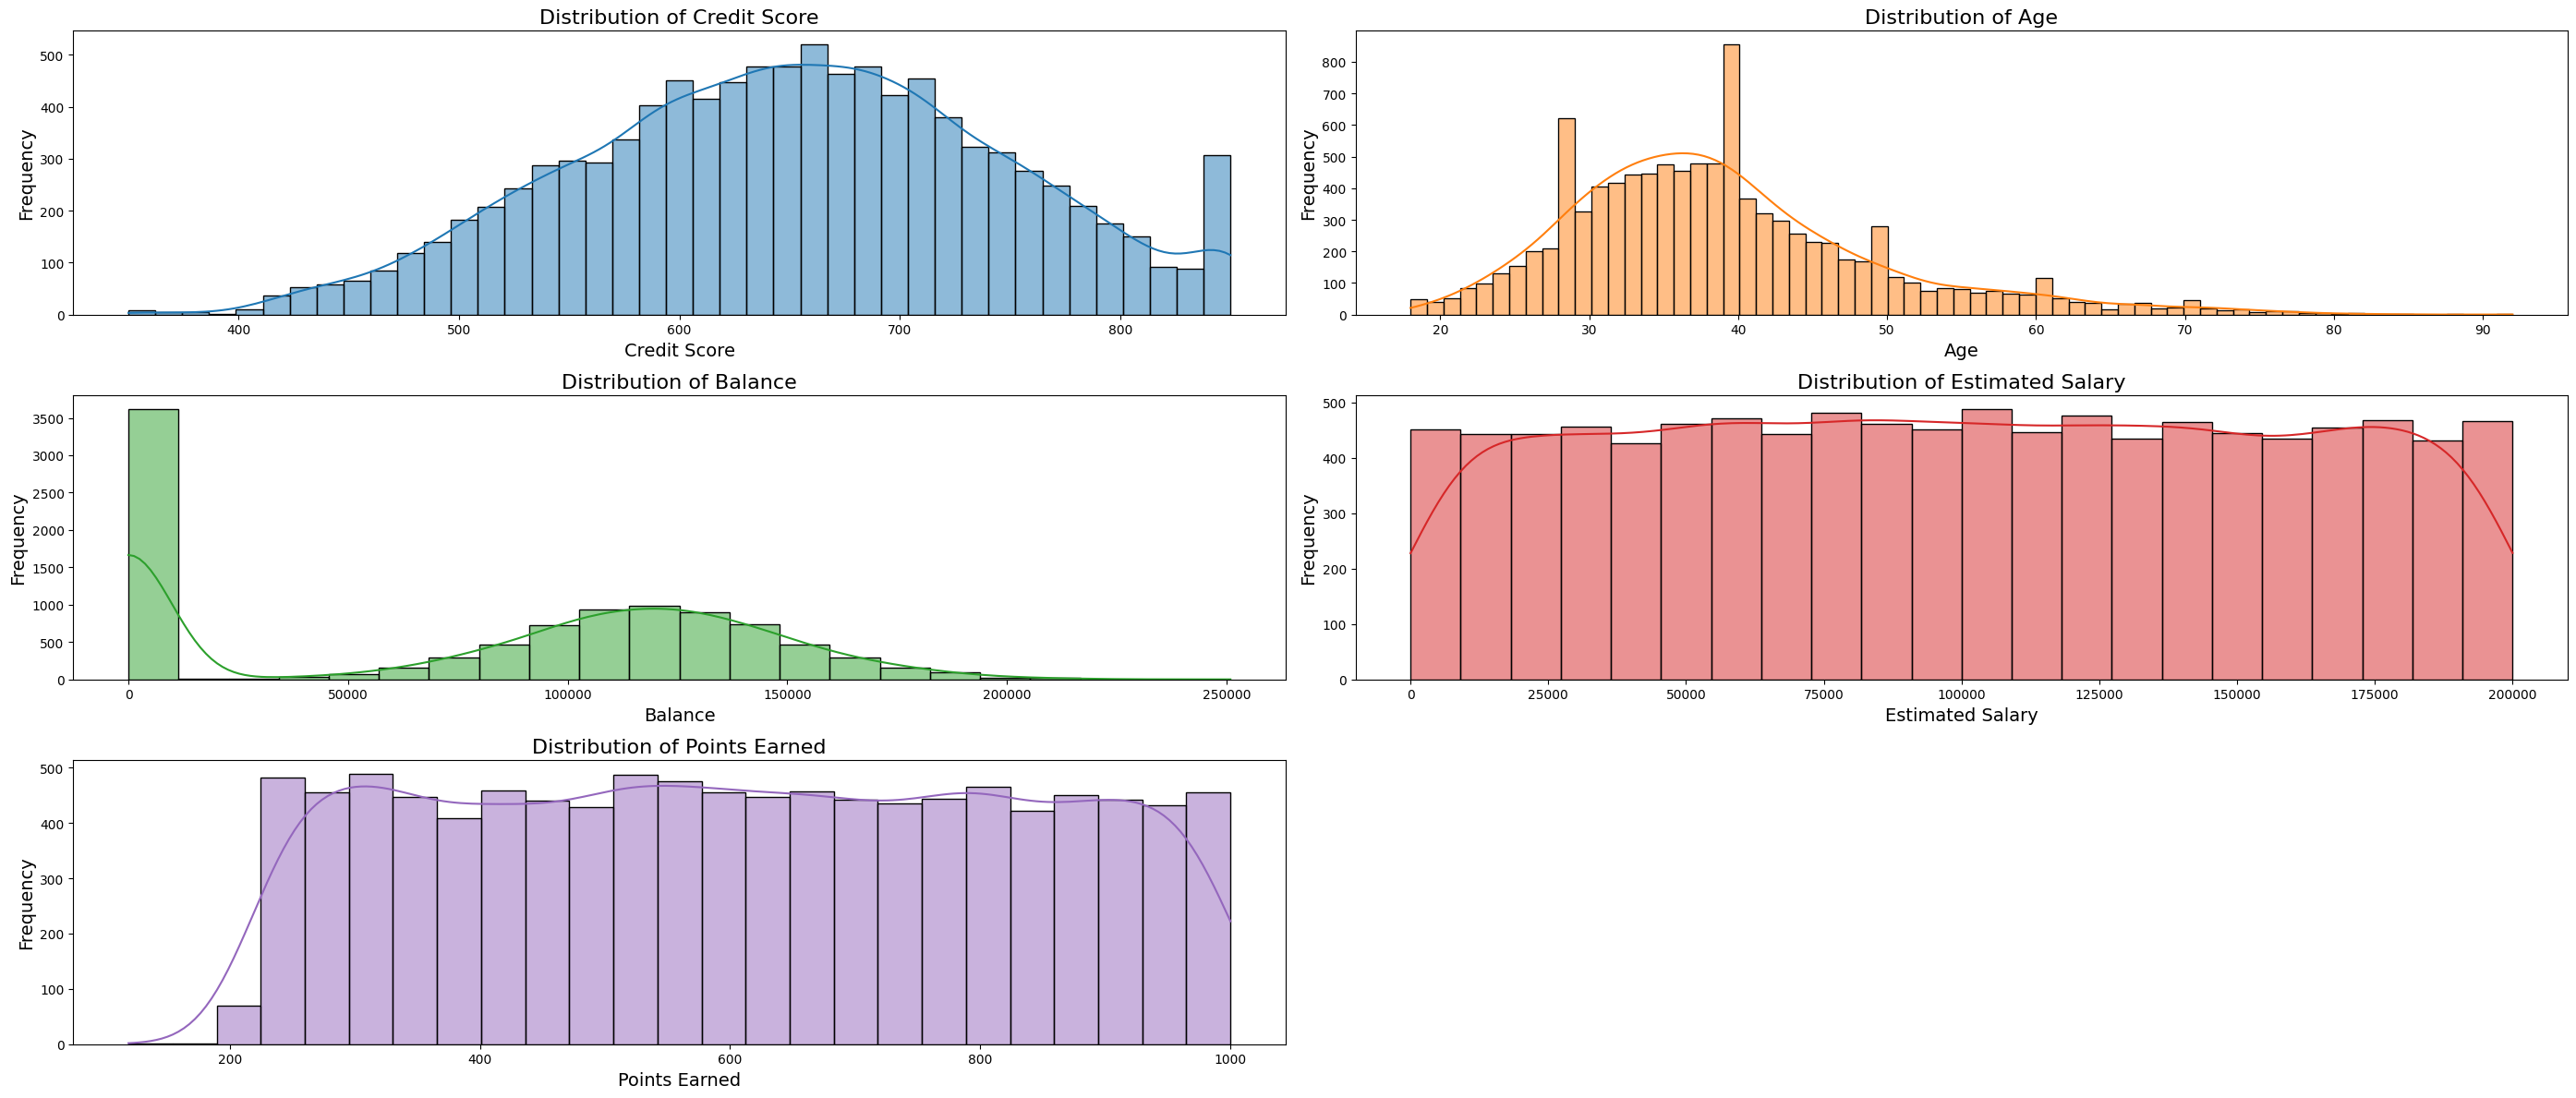

In [11]:
plt.figure(figsize=(28, 12))

# Define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot Credit Score
plt.subplot(3, 2, 1)
sns.histplot(x=df['CreditScore'], kde=True, color=colors[0])
plt.title('Distribution of Credit Score', fontsize=16)
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Plot Age
plt.subplot(3, 2, 2)
sns.histplot(x=df['Age'], kde=True, color=colors[1])
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Plot Balance
plt.subplot(3, 2, 3)
sns.histplot(x=df['Balance'], kde=True, color=colors[2])
plt.title('Distribution of Balance', fontsize=16)
plt.xlabel('Balance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Plot Estimated Salary
plt.subplot(3, 2, 4)
sns.histplot(x=df['EstimatedSalary'], kde=True, color=colors[3])
plt.title('Distribution of Estimated Salary', fontsize=16)
plt.xlabel('Estimated Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Plot Point Earned
plt.subplot(3, 2, 5)
sns.histplot(x=df['Point Earned'], kde=True, color=colors[4])
plt.title('Distribution of Points Earned', fontsize=16)
plt.xlabel('Points Earned', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

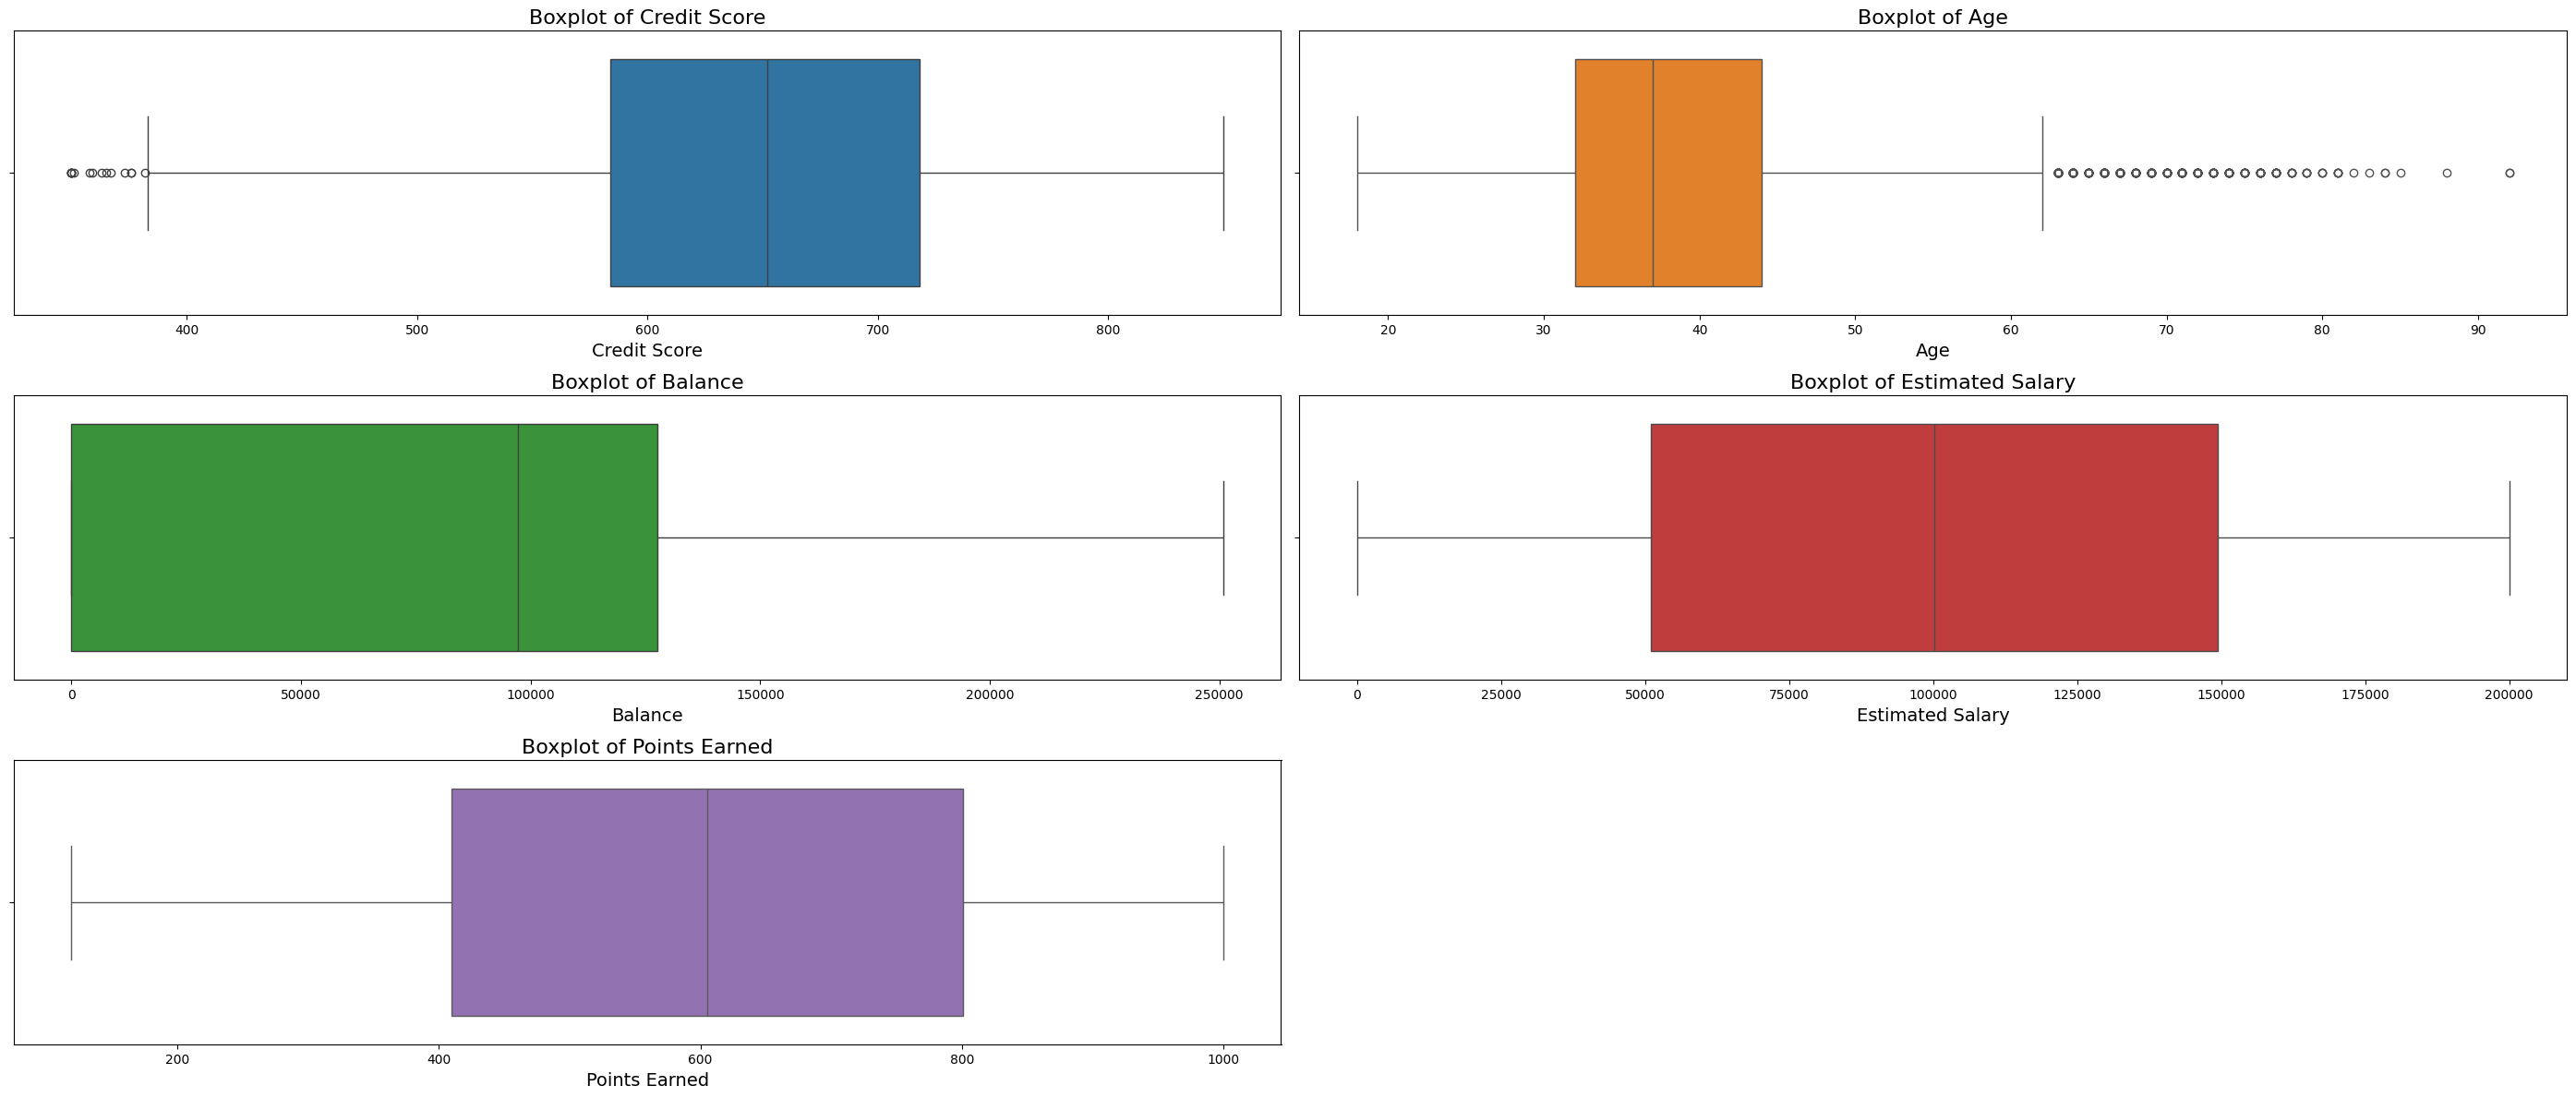

In [12]:
plt.figure(figsize=(28, 12))

# Define colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot Credit Score
plt.subplot(3, 2, 1)
sns.boxplot(x=df['CreditScore'], color=colors[0])
plt.title('Boxplot of Credit Score', fontsize=16)
plt.xlabel('Credit Score', fontsize=14)

# Plot Age
plt.subplot(3, 2, 2)
sns.boxplot(x=df['Age'], color=colors[1])
plt.title('Boxplot of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)

# Plot Balance
plt.subplot(3, 2, 3)
sns.boxplot(x=df['Balance'], color=colors[2])
plt.title('Boxplot of Balance', fontsize=16)
plt.xlabel('Balance', fontsize=14)

# Plot Estimated Salary
plt.subplot(3, 2, 4)
sns.boxplot(x=df['EstimatedSalary'], color=colors[3])
plt.title('Boxplot of Estimated Salary', fontsize=16)
plt.xlabel('Estimated Salary', fontsize=14)

# Plot Point Earned
plt.subplot(3, 2, 5)
sns.boxplot(x=df['Point Earned'], color=colors[4])
plt.title('Boxplot of Points Earned', fontsize=16)
plt.xlabel('Points Earned', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

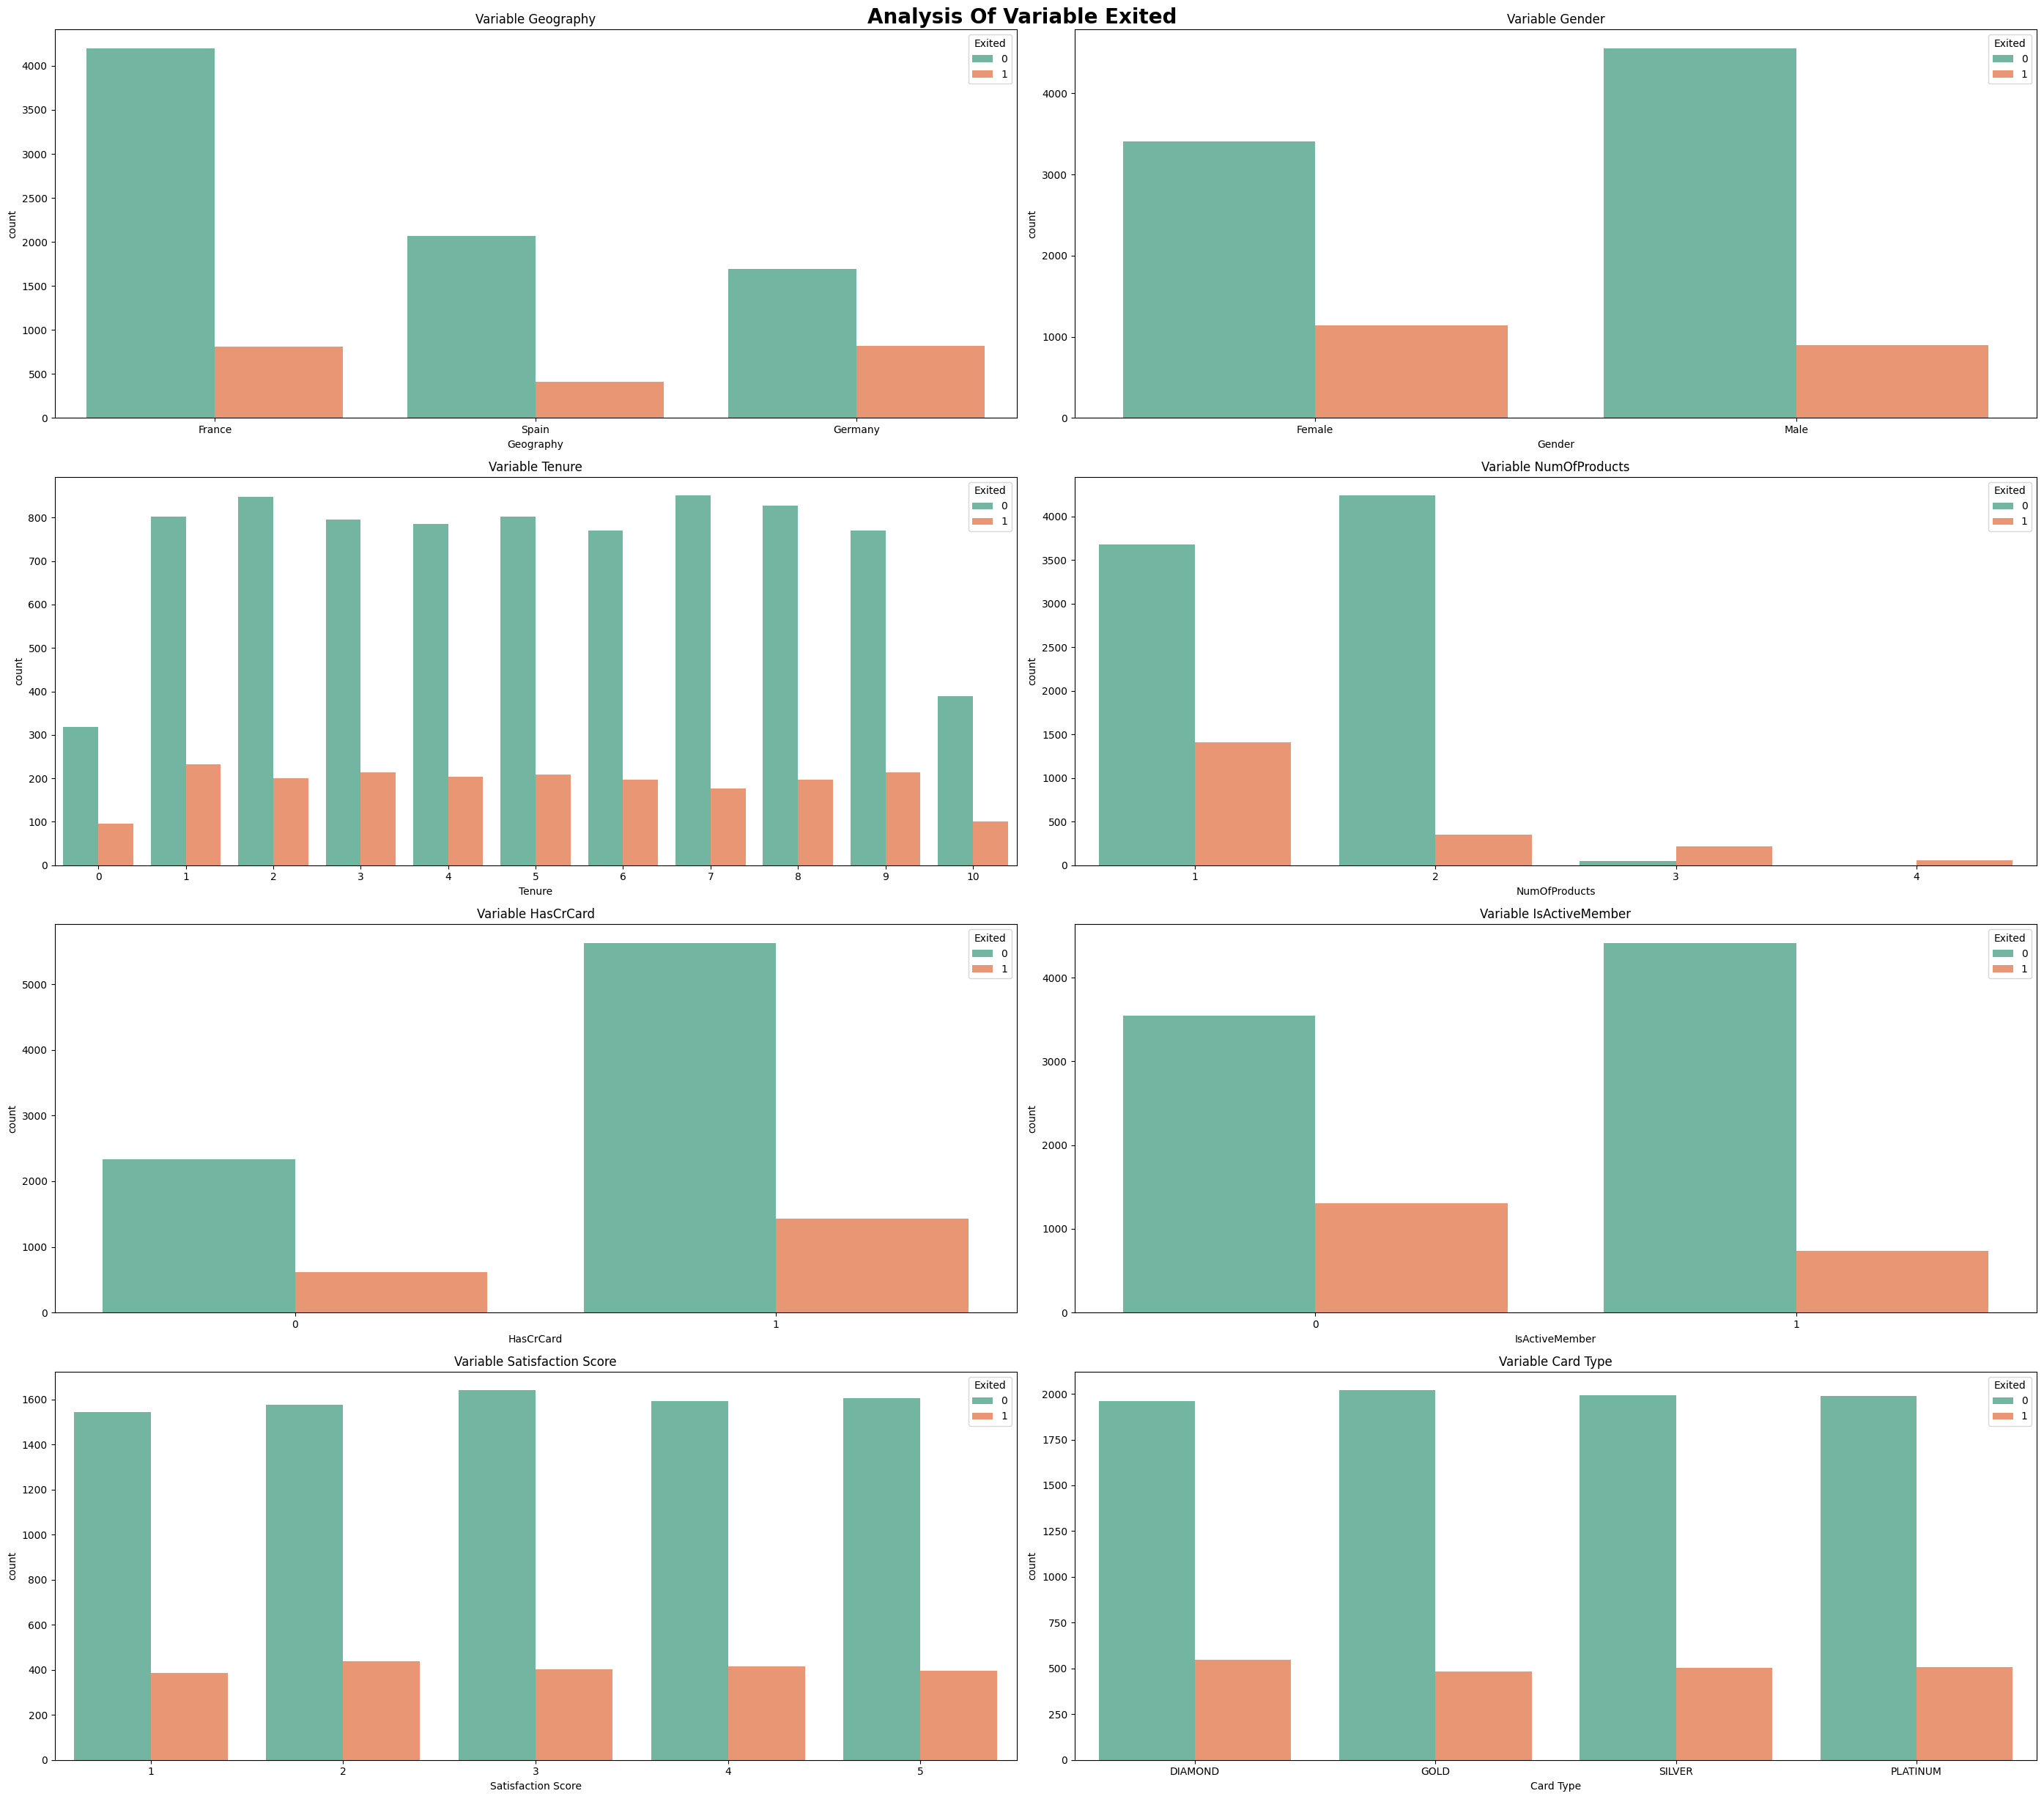

In [13]:
plt.figure(figsize=(28, 25))
plt.suptitle("Analysis Of Variable Exited", fontweight="bold", fontsize=20)

# Define colors
palette = 'Set2'

# Plot Variable Geography
plt.subplot(4, 2, 1)
plt.title('Variable Geography')
sns.countplot(x='Geography', hue='Exited', palette=palette, data=df)

# Plot Variable Gender
plt.subplot(4, 2, 2)
plt.title('Variable Gender')
sns.countplot(x='Gender', hue='Exited', palette=palette, data=df)

# Plot Variable Tenure
plt.subplot(4, 2, 3)
plt.title('Variable Tenure')
sns.countplot(x='Tenure', hue='Exited', palette=palette, data=df)

# Plot Variable NumOfProducts
plt.subplot(4, 2, 4)
plt.title('Variable NumOfProducts')
sns.countplot(x='NumOfProducts', hue='Exited', palette=palette, data=df)

# Plot Variable HasCrCard
plt.subplot(4, 2, 5)
plt.title('Variable HasCrCard')
sns.countplot(x='HasCrCard', hue='Exited', palette=palette, data=df)

# Plot Variable IsActiveMember
plt.subplot(4, 2, 6)
plt.title('Variable IsActiveMember')
sns.countplot(x='IsActiveMember', hue='Exited', palette=palette, data=df)

# Plot Variable Satisfaction Score
plt.subplot(4, 2, 7)
plt.title('Variable Satisfaction Score')
sns.countplot(x='Satisfaction Score', hue='Exited', palette=palette, data=df)

# Plot Variable Card Type
plt.subplot(4, 2, 8)
plt.title('Variable Card Type')
sns.countplot(x='Card Type', hue='Exited', palette=palette, data=df)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### Feature Engineering

In [14]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9347,9348,15802809,Vidal,660,Spain,Female,36,0,84438.57,1,1,1,181449.51,0,0,4,DIAMOND,699
7956,7957,15731569,Hudson,850,France,Male,81,5,0.00,2,1,1,44827.47,0,0,2,SILVER,237
7796,7797,15773949,Cherkasova,692,France,Female,36,3,0.00,2,1,1,8282.22,0,0,5,SILVER,767
4084,4085,15750458,Hawkins,693,France,Female,39,4,0.00,2,0,1,142331.39,0,0,1,PLATINUM,550
2300,2301,15647266,Y?an,651,Spain,Female,45,10,135923.16,1,1,0,18732.84,0,0,3,GOLD,500


In [15]:
class DropUnnecessary(BaseEstimator, TransformerMixin):
    
    def __init__(self) -> None:
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        X = X.copy()
        
        col_to_remove = ['RowNumber', 'CustomerId', 'Surname']
        
        X = X.drop(columns=col_to_remove)
        
        return X
    

class HandlingOutliers:

    def __init__(self):
        
        pass
        
    
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X, y=None):
        
        X = X.copy()
        
        outliers_columns = ['Age']
 
        for col in outliers_columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            
            IQR = Q3 - Q1
            
            maximum_threshold = Q3 + 1.5 * IQR
            minimum_threshold = Q1 - 1.5 * IQR
            
            X[col] = np.where(X[col] > maximum_threshold, maximum_threshold,
                                           np.where(X[col] < minimum_threshold, minimum_threshold,
                                                    X[col]))
        
        return X
    

class Encoding(BaseEstimator, TransformerMixin):
    
    def __init__(self) -> None:
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        X = X.copy()
        
        X = pd.get_dummies(X, drop_first=True, dtype=int)
        
        return X


class Scalling(BaseEstimator, TransformerMixin):
    
    def __init__(self) -> None:
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        X = X.copy()
        
        scaler = StandardScaler()
        
        cols = X.columns
        
        X[cols] = scaler.fit_transform(X[cols])
        
        return X

### Making Pipeline

In [16]:
preprocessing = Pipeline([
    ('drop', DropUnnecessary()),
    ('outliers', HandlingOutliers()),
    ('encoding', Encoding()),
    ('scaling', Scalling())
])

### Spliting Data

In [17]:
X,y = df.drop(columns='Exited'), df.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### OverSampling

In [18]:
ros = RandomOverSampler(random_state=0)

X_train, y_train = ros.fit_resample(X_train, y_train)

In [19]:
def test_model(model, X_train, X_test, y_train, y_test):
    
    y_pred = model.predict(X_test)

    # Perform cross-validation
    cv_scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)

    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("Cross-validation scores:", cv_scores)
    print("Mean cross-validation score:", cv_scores.mean())
    
    

### Model Traning

#### Logistic Regression

In [20]:
logistic = Pipeline([
    ('preprocessing', preprocessing),
    ('logistic', LogisticRegression(n_jobs=-1))
])

In [21]:
logistic.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('drop', DropUnnecessary()),
                                 ('outliers',
                                  <__main__.HandlingOutliers object at 0x0000028A3D8C3810>),
                                 ('encoding', Encoding()),
                                 ('scaling', Scalling())])),
                ('logistic', LogisticRegression(n_jobs=-1))])

#### SGDClassifier

In [22]:
sgd = Pipeline([
    ('preprocessing', preprocessing),
    ('sgd', SGDClassifier(n_jobs=-1))
])

In [23]:
sgd.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('drop', DropUnnecessary()),
                                 ('outliers',
                                  <__main__.HandlingOutliers object at 0x0000028A3D8C3810>),
                                 ('encoding', Encoding()),
                                 ('scaling', Scalling())])),
                ('sgd', SGDClassifier(n_jobs=-1))])

#### Random Forest Classifier

In [24]:
rfc = Pipeline([
    ('preprocessing', preprocessing),
    ('sgd', RandomForestClassifier(n_jobs=-1))
])

In [25]:
rfc.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('drop', DropUnnecessary()),
                                 ('outliers',
                                  <__main__.HandlingOutliers object at 0x0000028A3D8C3810>),
                                 ('encoding', Encoding()),
                                 ('scaling', Scalling())])),
                ('sgd', RandomForestClassifier(n_jobs=-1))])

#### Gradient Boosting Classifier

In [26]:
gbc = Pipeline([
    ('preprocessing', preprocessing),
    ('sgd', GradientBoostingClassifier())
])

In [27]:
gbc.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('drop', DropUnnecessary()),
                                 ('outliers',
                                  <__main__.HandlingOutliers object at 0x0000028A3D8C3810>),
                                 ('encoding', Encoding()),
                                 ('scaling', Scalling())])),
                ('sgd', GradientBoostingClassifier())])

### Testing Model

In [28]:
test_model(logistic, X_train, X_test, y_train, y_test)

0.9925
[[1593   14]
 [   1  392]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1607
           1       0.97      1.00      0.98       393

    accuracy                           0.99      2000
   macro avg       0.98      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Cross-validation scores: [0.99842644 0.99842644 0.99842644 0.99803304 0.99842644]
Mean cross-validation score: 0.998347757671125


In [29]:
test_model(sgd, X_train, X_test, y_train, y_test)

0.9985
[[1605    2]
 [   1  392]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Cross-validation scores: [0.99842644 0.99842644 0.99842644 0.99803304 0.99842644]
Mean cross-validation score: 0.998347757671125


In [30]:
import pickle

In [31]:
with open('Churn_Module.pkl', 'wb') as file:
    pickle.dump(sgd, file)

In [32]:
with open('Churn_Module.pkl', 'rb') as file:
    ML_Model = pickle.load(file)

In [33]:
ML_Model.predict(X_test)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)